In [82]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

### Sparsity and selectivity and test accuracy in one graph

In [83]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 6 == 0:
                line = ast.literal_eval(line)
                test_val_accumulator.append(line[-1])
    
#     print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [84]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 6 == 0:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    sparsity_accumulator.append(0)
                else:
                    sparsity_accumulator.append(sparsity_list[-1])
                
    
    
    for i, element in enumerate(sparsity_accumulator):
        if not 0 <= element <= 1:
#             print(f"{i}-th element: error")
            sparsity_accumulator[i] = 0
    
#     print("\nsparsity_accumulator: ", sparsity_accumulator)
    return sparsity_accumulator

In [85]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 3) % 6 == 0:
                selectivity_average = ast.literal_eval(line)
                selectivity_average_accumulator.append(selectivity_average)
            if (i - 4) % 6 == 0:
                selectivity_std = ast.literal_eval(line)
                selectivity_std_accumulator.append(selectivity_std)
    
#     print("\nselectivity_average_accumulator: ", selectivity_average_accumulator)
#     print("\nselectivity_std_accumulator: ", selectivity_std_accumulator)
    return selectivity_average_accumulator, selectivity_std_accumulator

In [86]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    ax1.plot(__list__, test_acc_list, marker='o', label='test accuracy', c='r')
    ax1.plot(__list__, sparsity_list, marker='v', label='sparsity', c='goldenrod')
    ax1.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax1.set_ylim([-0.2,1.2])
    ax1.grid()
    ax1.legend(loc=location)
    ax1.set_title('Accuracy, Sparsity, and Selectivity')
    
    # Accuracy x Sparsity (or Selectivity)
    ax2.plot(__list__, [a * b for a, b in zip(test_acc_list, sparsity_list)], 
             marker='v', label='Accuracy x Sparsity', c='orange')
    ax2.plot(__list__, [a * b for a, b in zip(test_acc_list, selectivity_average_list)], 
             marker='^', label='Accuracy x Selectivity', c='purple')
    ax2.set_ylim([-0.2,1.2])
    ax2.legend(loc=location)
    ax2.grid()
    ax2.set_title('Accuracy x Sparsity (and Selectivity)')
    
    plt.show()

In [87]:
rho_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
betas_lhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
betas_rhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
learning_rate = np.logspace(-5, 1, 11)
weight_decay = np.logspace(-5, 1, 11)
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [88]:
sgd_wd_test = test_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')
sgd_wd_spar = sparsity_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')
sgd_wd_sele = selectivity_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')

adagrad_wd_test = test_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')
adagrad_wd_spar = sparsity_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')
adagrad_wd_sele = selectivity_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')

adadelt_wd_test = test_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')
adadelt_wd_spar = sparsity_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')
adadelt_wd_sele = selectivity_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')

adam_wd_test = test_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')
adam_wd_spar = sparsity_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')
adam_wd_sele = selectivity_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')

In [89]:
sgd_lr_test = test_val_extractor('sparsity_selectivity_SGD_learning_rate.txt')
sgd_lr_spar = sparsity_val_extractor('sparsity_selectivity_SGD_learning_rate.txt')
sgd_lr_sele = selectivity_val_extractor('sparsity_selectivity_SGD_learning_rate.txt')

adagrad_lr_test = test_val_extractor('sparsity_selectivity_adagrad_learning_rate.txt')
adagrad_lr_spar = sparsity_val_extractor('sparsity_selectivity_adagrad_learning_rate.txt')
adagrad_lr_sele = selectivity_val_extractor('sparsity_selectivity_adagrad_learning_rate.txt')

adadelt_lr_test = test_val_extractor('sparsity_selectivity_adadelta_learning_rate.txt')
adadelt_lr_spar = sparsity_val_extractor('sparsity_selectivity_adadelta_learning_rate.txt')
adadelt_lr_sele = selectivity_val_extractor('sparsity_selectivity_adadelta_learning_rate.txt')

adam_lr_test = test_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')
adam_lr_spar = sparsity_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')
adam_lr_sele = selectivity_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')

In [90]:
sgd_mome_test = test_val_extractor('sparsity_selectivity_SGD_momentum.txt')
sgd_mome_spar = sparsity_val_extractor('sparsity_selectivity_SGD_momentum.txt')
sgd_mome_sele = selectivity_val_extractor('sparsity_selectivity_SGD_momentum.txt')

adadelta_rho_test = test_val_extractor('sparsity_selectivity_adadelta_rho.txt')
adadelta_rho_spar = sparsity_val_extractor('sparsity_selectivity_adadelta_rho.txt')
adadelta_rho_sele = selectivity_val_extractor('sparsity_selectivity_adadelta_rho.txt')

adam_beta_lhs_test = test_val_extractor('sparsity_selectivity_Adam_betas_lhs.txt')
adam_beta_lhs_spar = sparsity_val_extractor('sparsity_selectivity_Adam_betas_lhs.txt')
adam_beta_lhs_sele = selectivity_val_extractor('sparsity_selectivity_Adam_betas_lhs.txt')

adam_beta_rhs_test = test_val_extractor('sparsity_selectivity_Adam_betas_rhs.txt')
adam_beta_rhs_spar = sparsity_val_extractor('sparsity_selectivity_Adam_betas_rhs.txt')
adam_beta_rhs_sele = selectivity_val_extractor('sparsity_selectivity_Adam_betas_rhs.txt')

In [91]:
len(sgd_wd_test)

11

# Weight deacy

[]

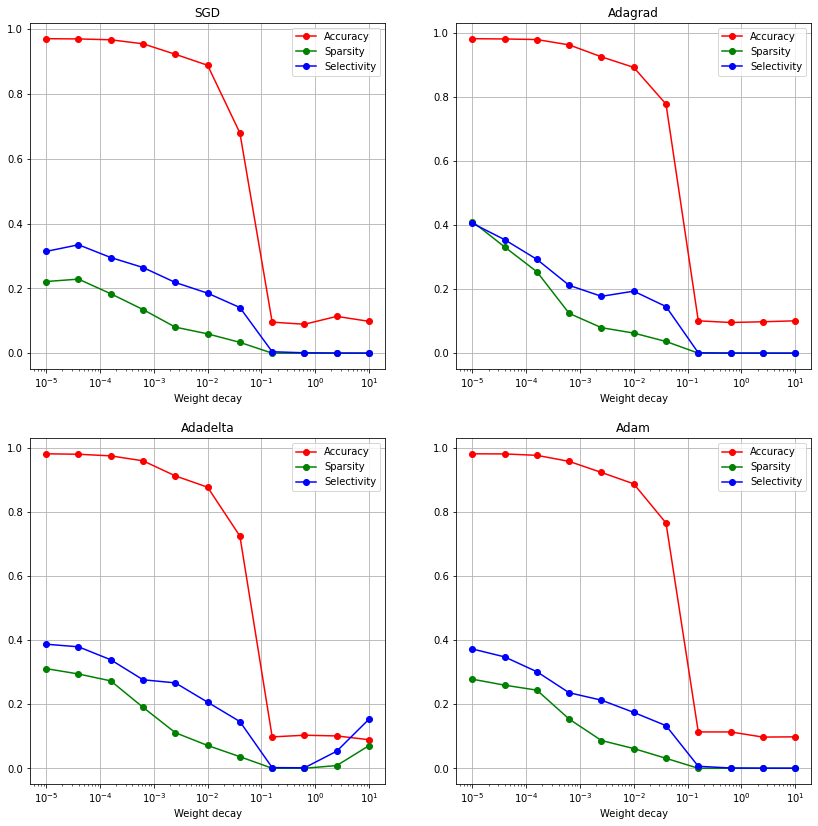

In [94]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

# sgd
ax1.plot(weight_decay, sgd_wd_test, label='Accuracy', marker='o' ,c='red')
ax1.plot(weight_decay, sgd_wd_spar, label='Sparsity', marker='o' ,c='green')
ax1.plot(weight_decay, sgd_wd_sele[0], label='Selectivity', marker='o' ,c='blue')

# adagrad
ax2.plot(weight_decay, adagrad_wd_test, label='Accuracy', marker='o' ,c='red')
ax2.plot(weight_decay, adagrad_wd_spar, label='Sparsity', marker='o' ,c='green')
ax2.plot(weight_decay, adagrad_wd_sele[0], label='Selectivity', marker='o' ,c='blue')

# adadelta 
ax3.plot(weight_decay, adadelt_wd_test, label='Accuracy', marker='o' ,c='red')
ax3.plot(weight_decay, adadelt_wd_spar, label='Sparsity', marker='o' ,c='green')
ax3.plot(weight_decay, adadelt_wd_sele[0], label='Selectivity', marker='o' ,c='blue')

# adam
ax4.plot(weight_decay, adam_wd_test, label='Accuracy', marker='o' ,c='red')
ax4.plot(weight_decay, adam_wd_spar, label='Sparsity', marker='o' ,c='green')
ax4.plot(weight_decay, adam_wd_sele[0], label='Selectivity', marker='o' ,c='blue')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_title('SGD')
ax2.set_title('Adagrad')
ax3.set_title('Adadelta')
ax4.set_title('Adam')

ax1.set_xlabel('Weight decay')
ax2.set_xlabel('Weight decay')
ax3.set_xlabel('Weight decay')
ax4.set_xlabel('Weight decay')

plt.plot()

# Learning rate

[]

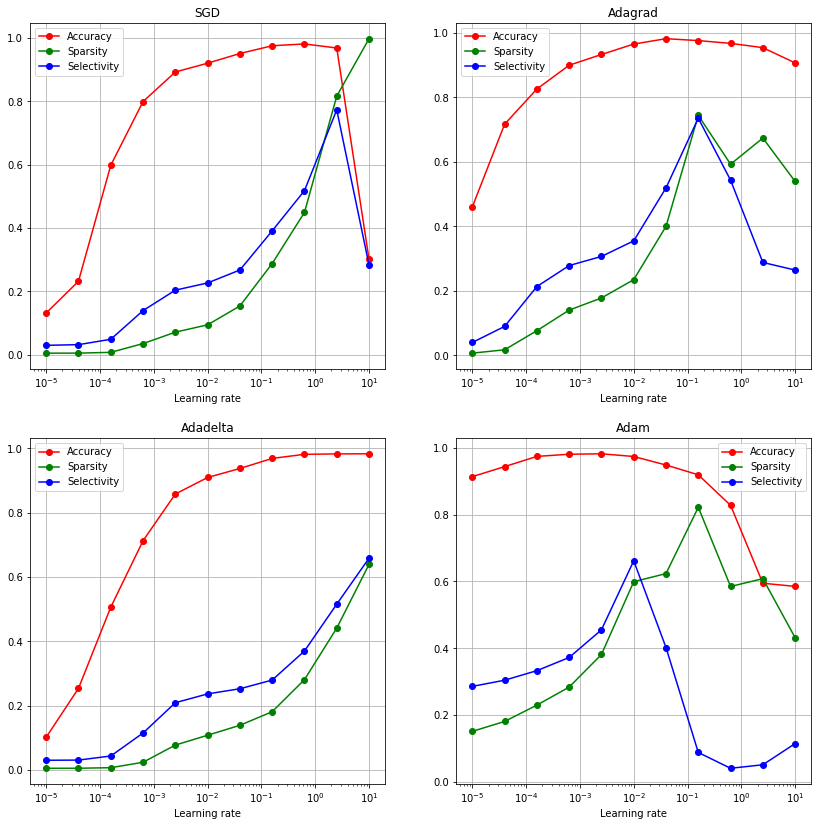

In [95]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

# sgd
ax1.plot(learning_rate, sgd_lr_test, label='Accuracy', marker='o' ,c='red')
ax1.plot(learning_rate, sgd_lr_spar, label='Sparsity', marker='o' ,c='green')
ax1.plot(learning_rate, sgd_lr_sele[0], label='Selectivity', marker='o' ,c='blue')

# adagrad
ax2.plot(learning_rate, adagrad_lr_test, label='Accuracy', marker='o' ,c='red')
ax2.plot(learning_rate, adagrad_lr_spar, label='Sparsity', marker='o' ,c='green')
ax2.plot(learning_rate, adagrad_lr_sele[0], label='Selectivity', marker='o' ,c='blue')

# adadelta 
ax3.plot(learning_rate, adadelt_lr_test, label='Accuracy', marker='o' ,c='red')
ax3.plot(learning_rate, adadelt_lr_spar, label='Sparsity', marker='o' ,c='green')
ax3.plot(learning_rate, adadelt_lr_sele[0], label='Selectivity', marker='o' ,c='blue')

# adam
ax4.plot(learning_rate, adam_lr_test, label='Accuracy', marker='o' ,c='red')
ax4.plot(learning_rate, adam_lr_spar, label='Sparsity', marker='o' ,c='green')
ax4.plot(learning_rate, adam_lr_sele[0], label='Selectivity', marker='o' ,c='blue')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_title('SGD')
ax2.set_title('Adagrad')
ax3.set_title('Adadelta')
ax4.set_title('Adam')

ax1.set_xlabel('Learning rate')
ax2.set_xlabel('Learning rate')
ax3.set_xlabel('Learning rate')
ax4.set_xlabel('Learning rate')

plt.plot()

# Other hyper parameter

[]

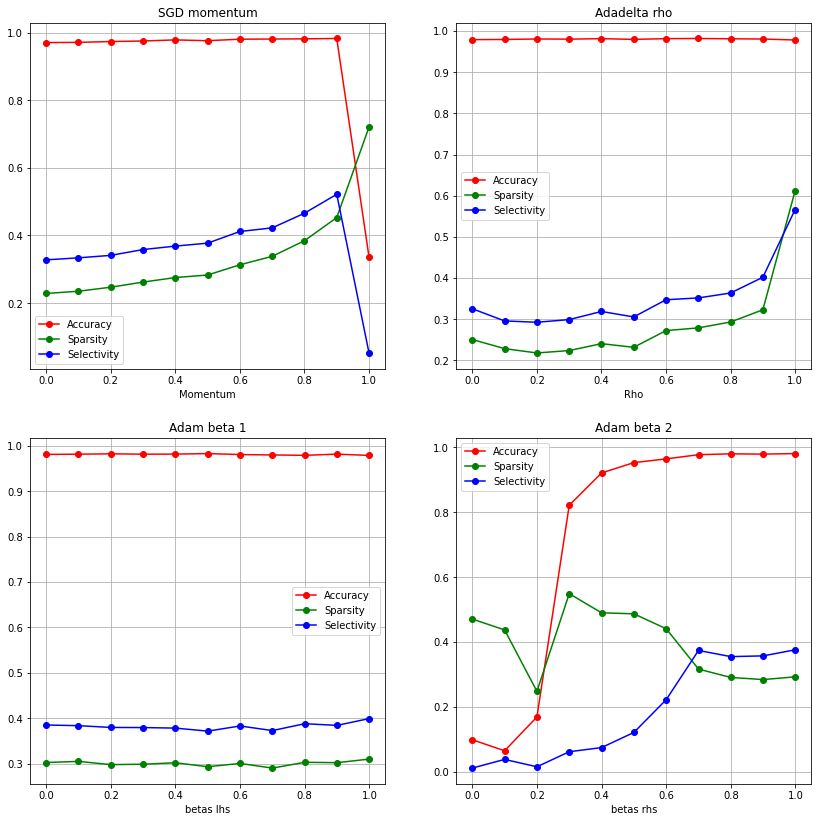

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

# sgd
ax1.plot(momentum, sgd_mome_test, label='Accuracy', marker='o' ,c='red')
ax1.plot(momentum, sgd_mome_spar, label='Sparsity', marker='o' ,c='green')
ax1.plot(momentum, sgd_mome_sele[0], label='Selectivity', marker='o' ,c='blue')

# adagrad
ax2.plot(rho_list, adadelta_rho_test, label='Accuracy', marker='o' ,c='red')
ax2.plot(rho_list, adadelta_rho_spar, label='Sparsity', marker='o' ,c='green')
ax2.plot(rho_list, adadelta_rho_sele[0], label='Selectivity', marker='o' ,c='blue')

# adadelta 
ax3.plot(betas_lhs, adam_beta_lhs_test, label='Accuracy', marker='o' ,c='red')
ax3.plot(betas_lhs, adam_beta_lhs_spar, label='Sparsity', marker='o' ,c='green')
ax3.plot(betas_lhs, adam_beta_lhs_sele[0], label='Selectivity', marker='o' ,c='blue')

# adam
ax4.plot(betas_rhs, adam_beta_rhs_test, label='Accuracy', marker='o' ,c='red')
ax4.plot(betas_rhs, adam_beta_rhs_spar, label='Sparsity', marker='o' ,c='green')
ax4.plot(betas_rhs, adam_beta_rhs_sele[0], label='Selectivity', marker='o' ,c='blue')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_title('SGD momentum')
ax2.set_title('Adadelta rho')
ax3.set_title('Adam beta 1')
ax4.set_title('Adam beta 2')

ax1.set_xlabel('Momentum')
ax2.set_xlabel('Rho')
ax3.set_xlabel('betas lhs')
ax4.set_xlabel('betas rhs')

plt.plot()